# Problem statement

    Collection of documents given in an folder
    Basic preprocessing of the data(Stemming, N-Grams, Stopwords etc)
    Convert into the TF-IDF Matrix (Create a TF-IDF Program from scratch)
    Cluster the Matrix of data (Create KMeans clustering from scratch)
    Create a confusion matrix and Map the cluster
    

# Introduction

from IPython.display import YouTubeVideo
YouTubeVideo('6L6yZLZ3Jhg', width=800, height=450)

### Explanation of this notebook - https://youtu.be/6L6yZLZ3Jhg

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import logging
logger = logging.getLogger(__name__)

In [2]:
import pandas as pd
import numpy as np

### Adding lib  path to the sys path.

For normal distribution it's not required. __init__ file will take care of this

In [3]:
import os
os.getcwd()
import sys
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.pardir, 'lib'))

'C:\\Users\\ajaighosh.ramachandr\\Desktop\\AJ\\studies_ml\\kaggle\\nineleaps\\tfidf_clustering\\run'

## KMeans clustering

https://brilliant.org/wiki/k-means-clustering/

## TF-IDF 


So, if we construct our document matrix out of counts, then we end up with numbers that don't contain much information, unless our goal was to see who uses 'the' most often.  

### TF-IDF - A better Strategy

Rather than just counting, we can use the [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf) score of a word to rank it's importance.   

The tfidf score of a word, w, is:
$$tf(w) * idf(w)$$

Where tf(w) = (Number of times the word appears in a document) / (Total number of words in the document)

And where idf(w) = log(Number of documents / Number of documents that contain word w ).

In [48]:
# Package imported
from cluster.kmeans import KMeans
from feature_extraction.tfidf import TfIdf

In [5]:
# Stored the path of corpus into a variable
path_to_corpus = os.path.join(os.getcwd(),os.pardir,'datasets', 'corpus')
path_to_corpus

'C:\\Users\\ajaighosh.ramachandr\\Desktop\\AJ\\studies_ml\\kaggle\\nineleaps\\tfidf_clustering\\run\\..\\datasets\\corpus'

In [7]:
# tfidf values
tfidf = TfIdf()
values = tfidf.tfidf_matrix(path_to_corpus=path_to_corpus, join_corpus = True)

In [8]:
values[0][5]
x = pd.DataFrame([values[0][0]])
y = pd.DataFrame([values[0][1]])
x
y
z = pd.DataFrame([values[0][5]])
result = pd.concat([x, y], axis=1)
result
final = pd.concat([result, z])
final

{'buy': 0.4306177413281265,
 'complaints': 0.7215274545261787,
 'happy': 0.5649320834642577,
 'odors': 0.6348840569561855,
 'refills': 0.5267593772703599,
 'road': 0.8081708520961719,
 'run': 0.6515754810342509,
 'trouble': 0.6708443160126581}

,bags,great,odor,regular,works
0,0.649298,0.637644,0.744905,0.822798,0.813494


,complain
0,5.366755


,bags,great,odor,regular,works,complain
0,0.649298,0.637644,0.744905,0.822798,0.813494,5.366755


,bags,buy,complain,complaints,great,happy,odor,odors,refills,regular,road,run,trouble,works
0,0.649298,NaN,5.366755,NaN,0.637644,NaN,0.744905,NaN,NaN,0.822798,NaN,NaN,NaN,0.813494
0,NaN,0.430618,NaN,0.721527,NaN,0.564932,NaN,0.634884,0.526759,NaN,0.808171,0.651575,0.670844,NaN


In [9]:
values[0][0]
values[0][-1]

{'bags': 0.6492981983802348,
 'great': 0.6376444167554397,
 'odor': 0.7449053585688348,
 'regular': 0.8227983119211795,
 'works': 0.8134943087942009}

{'bulky': 1.0226448567613315,
 'cameras': 0.5466156410220165,
 'capture': 0.7927251549850314,
 'moment': 0.9236238309670536,
 'unlike': 0.8657002440944586,
 'withyou': 1.0226448567613315,
 'yourlife': 1.0226448567613315}

In [10]:
# collecting all words
word_list = []
for doc in values:
    for sent in doc:
        word_list.extend(sent.keys())
len(set(word_list))

2510

In [41]:
# Converting Dictionay to DataFrame
def convert_list_to_df(values):
    main_df = pd.DataFrame([{"youve":0}])
    #for doc in range(len(values)):
    for sent in range(len(values)):
        temp = pd.DataFrame([values[sent]])
        main_df = pd.concat([main_df,temp])
    return main_df
main_df = convert_list_to_df(values[0])
main_df.head(3)

,abandoned,abhor,ability,abode,absolute,absolutely,absolutly,absorb,abused,accept,...,yield,yourlife,youve,yrs,zarent,zipper,zone,zoom,zoombrowser,zooms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
main_df.columns[:5]
from sklearn import preprocessing

Index(['abandoned', 'abhor', 'ability', 'abode', 'absolute'], dtype='object')

In [43]:
# Adding index to DF
main_df.index = range(len(main_df.index))

In [44]:
main_df = main_df.fillna(0)
#main_df.replace('Unknown', 0)
main_df.sample(2)

,abandoned,abhor,ability,abode,absolute,absolutely,absolutly,absorb,abused,accept,...,yield,yourlife,youve,yrs,zarent,zipper,zone,zoom,zoombrowser,zooms
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
len(main_df.abandoned[main_df.abandoned > 0])

1

In [17]:
train_X = np.array(main_df)
train_X = preprocessing.scale(train_X)

In [46]:
train_X[:1]

array([[-0.02803861, -0.02803861, -0.0467637 , ..., -0.0962468 ,
        -0.02803861, -0.03966818]])

## Applying KMeans clustering


In [49]:
clus = KMeans(tolerance=0.001, epochs=300)

In [50]:
train_X.shape

(1273, 2511)

In [51]:
print(clus.__doc__)


    KMeans class will initiate the number of clusters, tolerance, and epochs

    ***INPUT PARAMETERS***
    Keyword arguments:
    n_clusters: The number of cluster wants to get formed. Default parameter value is 2, Default parameter.
    tolerance: minimum tolerance of average between centroids. difference of average less than tolerance, cluster     optimized, Default parameter
    epochs: number of iterations for finding best cluster, Default parameter
    


In [52]:
#Not able to find the best means. Run time error
clus.fit(train_X)

..\lib\cluster\kmeans.py:77: RuntimeWarning: invalid value encountered in true_divide
  if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:


In [53]:
main_df.describe()

,abandoned,abhor,ability,abode,absolute,absolutely,absolutly,absorb,abused,accept,...,yield,yourlife,youve,yrs,zarent,zipper,zone,zoom,zoombrowser,zooms
count,1273.000000,1273.000000,1273.00000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,...,1273.000000,1273.000000,1273.0,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,0.000803,0.000625,0.00170,0.001406,0.001406,0.005216,0.000895,0.000433,0.005623,0.000937,...,0.000511,0.000803,0.0,0.000803,0.000703,0.000937,0.003212,0.008567,0.001406,0.001451
std,0.028662,0.022293,0.03637,0.050159,0.050159,0.080355,0.026578,0.015434,0.200636,0.033439,...,0.018240,0.028662,0.0,0.028662,0.025079,0.033439,0.064953,0.089049,0.050159,0.036595
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.022645,0.795390,0.86570,1.789628,1.789628,1.788918,0.923624,0.550655,7.158514,1.193086,...,0.650774,1.022645,0.0,1.022645,0.894814,1.193086,1.924073,1.506486,1.789628,0.923624


### Confusion matrix

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


In [55]:
from sklearn.cluster import KMeans
cl = KMeans(n_clusters=2)
cl.fit(train_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
tfidf1 = TfIdf()
values_2 = tfidf.tfidf_matrix(path_to_corpus=path_to_corpus, join_corpus = False)

In [58]:
values_2[1][:1]

[{'canon': 0.5954080281083677,
  'enjoyed': 1.1159459651972445,
  'powershot': 1.0348529435756115,
  'sd': 0.6189646352396444,
  'shooting': 0.8653933714981709}]

In [60]:
corpus1 = convert_list_to_df(values_2[0])
corpus2 = convert_list_to_df(values_2[1])
corpus1.head(1)
corpus2.head(2)

,abandoned,abhor,abode,absolute,absolutely,absolutly,absorb,access,accompanying,accuracy,...,wthe,wword,xp,yeah,year,years,yelling,youve,yrs,zone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


,ability,absolutely,abused,accept,acceptable,accurately,achieve,activation,actual,added,...,year,years,yield,yourlife,youve,zarent,zipper,zoom,zoombrowser,zooms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Adding index to DF
corpus1.index = range(len(corpus1.index))
corpus2.index = range(len(corpus2.index))
corpus1 = corpus1.fillna(0)
corpus2 = corpus2.fillna(0)
train_X1 = np.array(corpus1)
train_X2 = np.array(corpus2)
# X = np.concatenate((train_X1, train_X2), axis = 0)
# X
# train_X1 = preprocessing.scale(train_X1)
# train_X2 = preprocessing.scale(train_X2)

In [77]:
corpus1.head(2)
corpus1.shape

,abandoned,abhor,abode,absolute,absolutely,absolutly,absorb,access,accompanying,accuracy,...,wthe,wword,xp,yeah,year,years,yelling,youve,yrs,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(748, 1610)

In [108]:
first_review = corpus1[:372]
first_review.tail(3)
second_review = corpus1[372:]
second_review.head()

,abandoned,abhor,abode,absolute,absolutely,absolutly,absorb,access,accompanying,accuracy,...,wthe,wword,xp,yeah,year,years,yelling,youve,yrs,zone
369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,abandoned,abhor,abode,absolute,absolutely,absolutly,absorb,access,accompanying,accuracy,...,wthe,wword,xp,yeah,year,years,yelling,youve,yrs,zone
372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.409607,0.0,0.0,0.0,0.0
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [109]:
first_review = preprocessing.scale(first_review)
second_review = preprocessing.scale(second_review)
reviews_X = np.concatenate((first_review, second_review), axis = 0)

In [97]:
reviews_X.shape

(748, 1610)

In [118]:
from sklearn.cluster import KMeans
cl = KMeans(n_clusters=2)
cl.fit(reviews_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
%matplotlib inline
import seaborn as sns

In [112]:
sns.set(color_codes=True)

In [113]:
import matplotlib.pyplot as plt


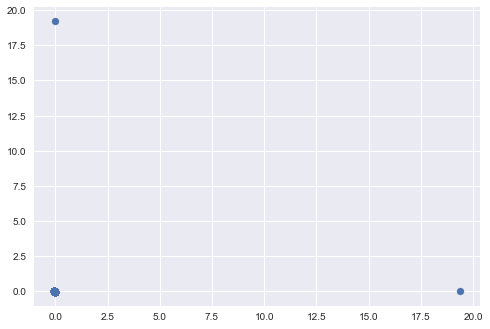

In [121]:
plt.scatter(reviews_X[:,0], reviews_X[:,1])

In [132]:
cl.predict(reviews_X[600])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [134]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## Confusion matrix

https://machinelearningmastery.com/confusion-matrix-machine-learning/

“true positive” for correctly predicted event values.

“false positive” for incorrectly predicted event values.

“true negative” for correctly predicted no-event values.

“false negative” for incorrectly predicted no-event values.

In [136]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
tn,fp,fn,tp

(0, 2, 1, 1)